In [1]:
from sklearn.model_selection import GridSearchCV
from thundersvm import SVC
import pandas as pd
from IPython.display import clear_output
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,recall_score
import pickle

In [2]:
train_X=pd.read_csv('dataset/train_X.csv')
test_X=pd.read_csv('dataset/test_X.csv')

train_y=pd.read_csv('dataset/train_y.csv')
test_y=pd.read_csv('dataset/test_y.csv')

SVM with RBF Kernel

In [3]:
def SVM_selector_rbf(X,Y):
           
    model=SVC(n_jobs=-1)
    properties={'C':[0.1,0.5,1,10],'kernel':['rbf']}
    
    grid=GridSearchCV(model,properties,scoring="accuracy",cv=10,return_train_score=True,verbose=5)
    grid.fit(X,Y.values.ravel())
    
    clear_output(wait=True)
    
    result=pd.DataFrame(grid.cv_results_)
    
    print ("Best Score: ", grid.best_score_)
    print ("Best Params: ", grid.best_params_)
    
    return grid.best_estimator_,result


In [4]:
best_model,result=SVM_selector_rbf(train_X,train_y)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV 1/10] END C=0.1, kernel=rbf;, score=(train=0.913, test=0.916) total time= 2.5min


In [ ]:
if 'best_model' in globals():
    
    model_filename = 'models/best_model_rbf.sav'
    pickle.dump(best_model, open(model_filename, 'wb'))

    result_filename = 'models/result_rbf.sav'
    pickle.dump(result, open(result_filename, 'wb'))

else:
    import pickle
    
    from thundersvm import SVC
    import pandas as pd
    
    from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,recall_score
    
    
    train_X=pd.read_csv('dataset/train_X.csv')
    test_X=pd.read_csv('dataset/test_X.csv')

    train_y=pd.read_csv('dataset/train_y.csv')
    test_y=pd.read_csv('dataset/test_y.csv')


    with open( "models/best_model_rbf.sav", "rb" ) as f:
        best_model = pickle.load(f)
    
    with open( "models/result_rbf.sav", "rb" ) as f:
        result = pickle.load(f)

In [ ]:
result[["param_C","mean_test_score","mean_train_score"]]

,param_C,mean_test_score,mean_train_score
0,0.1,0.943600,0.959609
1,1,0.936233,0.972628
2,10,0.925650,0.982519
3,50,0.920933,0.985783


In [ ]:
pred_y=best_model.predict(test_X)

accuracy_score(test_y,pred_y)

0.9424

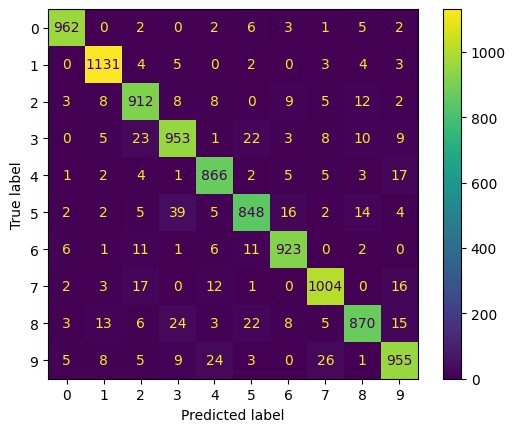

In [ ]:
cm = confusion_matrix(test_y, pred_y, labels=[x for x in range(10)])
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[x for x in range(10)]).plot()